# MNIST Handwritten Digit Model Training

### LIBRARIES AND DATA IMPORT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from livelossplot import PlotLossesKeras
from keras.utils import plot_model

from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

Using TensorFlow backend.


In [2]:
print(np.__version__)
print(keras.__version__)

1.18.5
2.3.1


In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()


print('Shape X_train: ', X_train.shape)
print('Shape X_test : ', X_test.shape)

print('Shape y_train: ', y_train.shape)
print('Shape y_test : ', y_test.shape)

Shape X_train:  (60000, 28, 28)
Shape X_test :  (10000, 28, 28)
Shape y_train:  (60000,)
Shape y_test :  (10000,)


### CHECK FOR IMPORT ERRORS

In [4]:
# A small checks to ensure that correct data have been imported

assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

### DATA VISUALIZATION

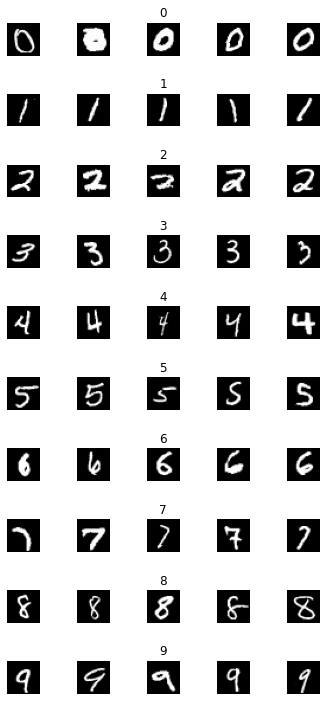

In [5]:
num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        
        # for title as the label in middle
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


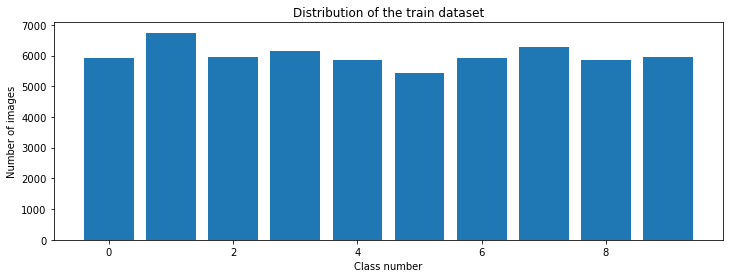

In [6]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

### Reshaping, OneHotEncoding, Normalizing

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1) # reshape(-1, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [8]:
print('Shape X_train: ', X_train.shape)
print('Shape X_test : ', X_test.shape)

Shape X_train:  (60000, 28, 28, 1)
Shape X_test :  (10000, 28, 28, 1)


### Model Building

    We are using the LeNet Model for this purpose.
   Below is the figure of **LeNet Architecture**

<img src='LeNet.png'>

In [9]:
def leNet_model():

    model = Sequential()

    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.1))
    
    model.add(Flatten())
    
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [10]:
np.random.seed(47)

model = leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)              

In [11]:
# plot_model(model, to_file='model.png', dpi=100)

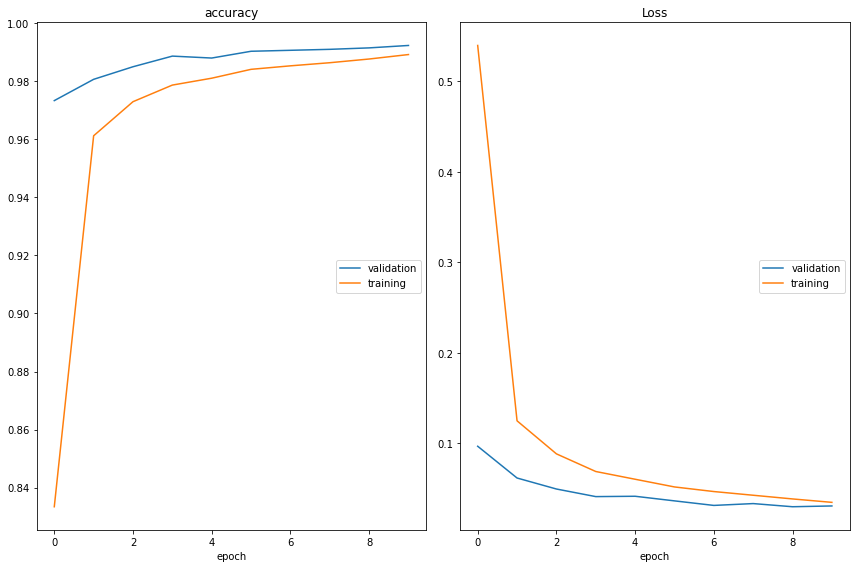

accuracy
	validation       	 (min:    0.973, max:    0.992, cur:    0.992)
	training         	 (min:    0.833, max:    0.989, cur:    0.989)
Loss
	validation       	 (min:    0.030, max:    0.097, cur:    0.031)
	training         	 (min:    0.035, max:    0.540, cur:    0.035)


In [12]:
history=model.fit(X_train, y_train, 
                  epochs=10,  validation_split = 0.1, 
                  batch_size = 400, verbose = 1, shuffle = 1, callbacks=[PlotLossesKeras()])

### Losses And Accuracy

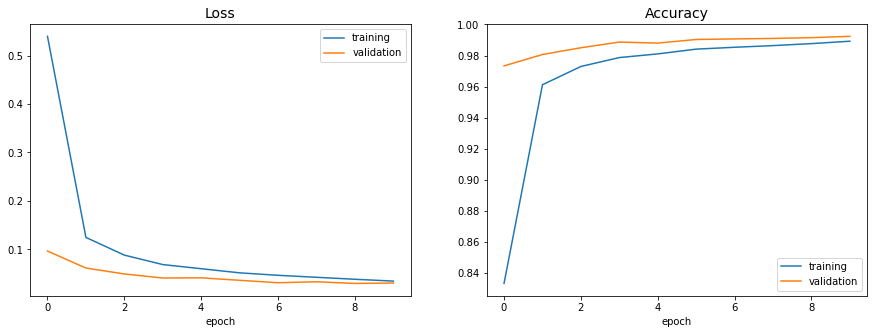

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss', fontsize=14)
plt.xlabel('epoch')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy', fontsize=14)
plt.xlabel('epoch')

plt.savefig('loss-accuracy.png', dpi=100)
plt.show()

In [14]:
score = model.evaluate(X_test, y_test, verbose=1)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 6s 568us/step

Test score: 0.02456029464651656
Test accuracy: 0.9912999868392944


## SAVE MODEL

In [ ]:
model.save('mnist-model.h5')

### LOADING MODEL

In [15]:
new_model = keras.models.load_model('mnist-model.h5')

In [16]:
test_data = X_test[0].reshape(-1, 28, 28, 1)
test_data.shape

(1, 28, 28, 1)

In [17]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [18]:
new_model.predict(test_data)

array([[2.8864509e-09, 6.3517732e-08, 2.7251892e-06, 6.4669161e-06,
        4.5305457e-10, 1.6497996e-09, 8.4864644e-14, 9.9998701e-01,
        5.4800843e-08, 3.6671011e-06]], dtype=float32)

In [19]:
np.argmax(model.predict(test_data), axis=-1)

array([7], dtype=int64)

## Making Predictions

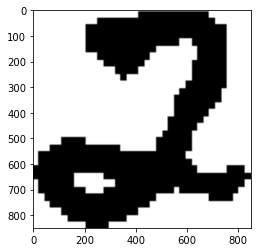

In [21]:

#predict internet number
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


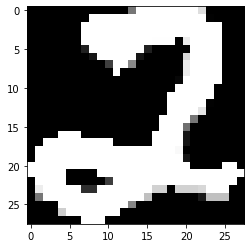

In [22]:
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img) # color interchange
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [23]:
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

(1, 28, 28, 1)


In [24]:
print("predicted digit: "+str(model.predict_classes(img)))

predicted digit: [2]


### APPENDIX: Visualizing Hidden Layers, Live Loss Plot

In [25]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


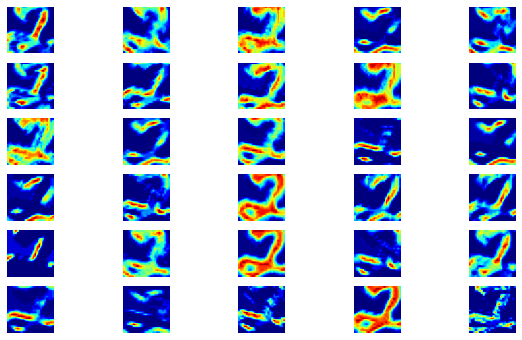

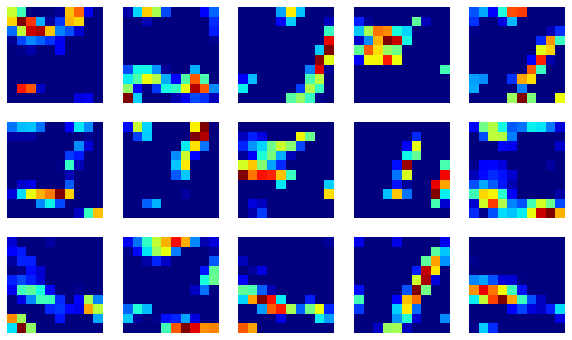

In [26]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

   **Live Loss Plot**
   
    from livelossplot import PlotLossesKeras

    model = leNet_model()

    callbacks = [PlotLossesKeras()]

    history=model.fit(X_train, y_train, 
                      epochs=10,  validation_split = 0.1, callbacks=callbacks, 
                      batch_size = 400, verbose = 1, shuffle = 1)